### Importación de datos



In [2]:
import pandas as pd
from matplotlib import pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

df_01 = './base-de-datos-challenge1-latam/tienda_1.csv'
df_02 = './base-de-datos-challenge1-latam/tienda_2.csv'
df_03 = './base-de-datos-challenge1-latam/tienda_3.csv'
df_04 = './base-de-datos-challenge1-latam/tienda_4.csv'

tienda = pd.read_csv(df_01)
tienda2 = pd.read_csv(df_02)
tienda3 = pd.read_csv(df_03)
tienda4 = pd.read_csv(df_04)

tienda2.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Silla de oficina,Muebles,"283,600.00","15,300.00",04/08/2021,Izabela de León,Medellín,1,Nequi,1,6.25,-75.56
1,Pandereta,Instrumentos musicales,"76,800.00","2,300.00",26/11/2020,Blanca Ramirez,Medellín,3,Tarjeta de crédito,4,6.25,-75.56
2,Cama king,Muebles,"443,300.00","23,800.00",22/10/2021,Izabela de León,Pereira,5,Tarjeta de crédito,10,4.81,-75.70
3,Cama king,Muebles,"906,200.00","46,400.00",04/05/2022,Maria Alfonso,Cali,5,Tarjeta de crédito,10,3.44,-76.52
4,Silla de oficina,Muebles,"397,800.00","19,400.00",26/02/2022,Lucas Olivera,Bogotá,4,Tarjeta de crédito,3,4.61,-74.08


# 1. Análisis de facturación



En este primer análisis, debes calcular el ingreso total de cada tienda. <b>Sumando los valores de la columna Precio</b> de cada conjunto de datos de la tienda para estimar los ingresos.

In [3]:
# Creando un diccionario con el total de la columna precio por tienda
total_por_tienda = {
    'Tienda 1': tienda['Precio'].sum(),
    'Tienda 2': tienda2['Precio'].sum(),
    'Tienda 3': tienda3['Precio'].sum(),
    'Tienda 4': tienda4['Precio'].sum()
}
for i in total_por_tienda:
    print(f"La {i} tiene un total de ingresos de ${total_por_tienda[i]:,.2f}")

La Tienda 1 tiene un total de ingresos de $1,150,880,400.00
La Tienda 2 tiene un total de ingresos de $1,116,343,500.00
La Tienda 3 tiene un total de ingresos de $1,098,019,600.00
La Tienda 4 tiene un total de ingresos de $1,038,375,700.00


In [4]:
# Metodos de pago
Metodos_de_pago = {
    'Tienda 1': tienda.groupby('Método de pago').aggregate(Método_de_pago=('Método de pago', 'count')),
    'Tienda 2': tienda2.groupby('Método de pago').aggregate(Método_de_pago=('Método de pago', 'count')),
    'Tienda 3': tienda3.groupby('Método de pago').aggregate(Método_de_pago=('Método de pago', 'count')),
    'Tienda 4': tienda4.groupby('Método de pago').aggregate(Método_de_pago=('Método de pago', 'count')),
}
for i, metodos in Metodos_de_pago.items():
    print(i)
    print(metodos.sort_values(by='Método_de_pago', ascending=False))
    print('\n')

Tienda 1
                    Método_de_pago
Método de pago                    
Tarjeta de crédito            1704
Nequi                          483
Cupón                          137
Tarjeta de débito               35


Tienda 2
                    Método_de_pago
Método de pago                    
Tarjeta de crédito            1721
Nequi                          467
Cupón                          141
Tarjeta de débito               30


Tienda 3
                    Método_de_pago
Método de pago                    
Tarjeta de crédito            1753
Nequi                          468
Cupón                          101
Tarjeta de débito               37


Tienda 4
                    Método_de_pago
Método de pago                    
Tarjeta de crédito            1720
Nequi                          482
Cupón                          125
Tarjeta de débito               31





Metodo de pago en Tienda 1:


<Figure size 1000x600 with 0 Axes>

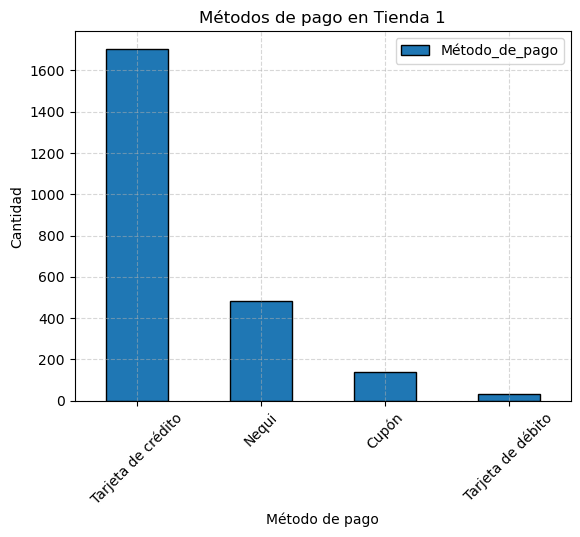


Metodo de pago en Tienda 2:


<Figure size 1000x600 with 0 Axes>

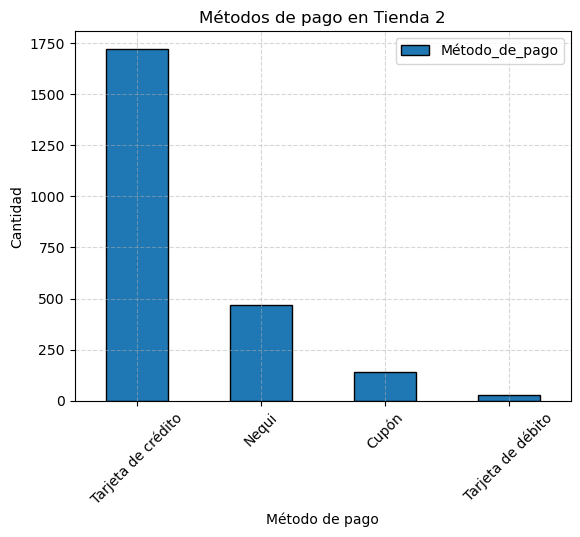


Metodo de pago en Tienda 3:


<Figure size 1000x600 with 0 Axes>

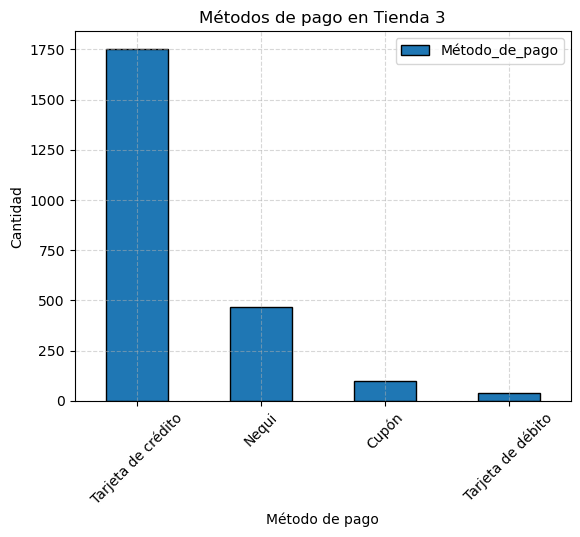


Metodo de pago en Tienda 4:


<Figure size 1000x600 with 0 Axes>

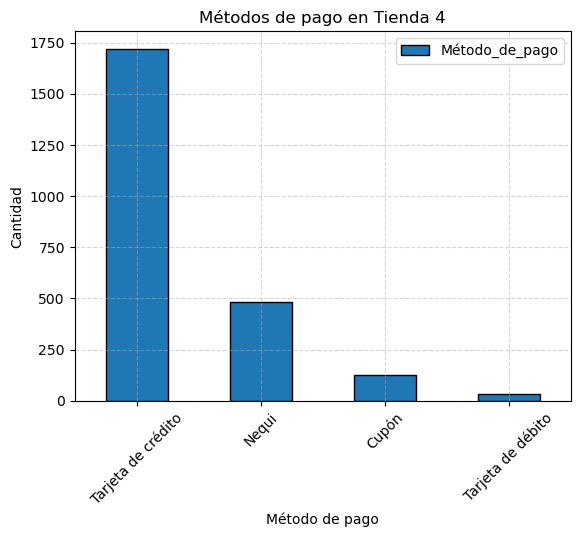

In [5]:
Metodos_de_pago = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4,
}

for i, df in Metodos_de_pago.items():
    print(f"\nMetodo de pago en {i}:")
    metodo_pago = df.groupby('Método de pago').aggregate(Método_de_pago=('Método de pago', 'count'))
    metodo_pago.sort_values(by='Método_de_pago', ascending=False, inplace=True)
    
    # Graficar
    plt.figure(figsize=(10, 6))
    metodo_pago.plot(kind='bar', width=0.5, edgecolor='black')
    plt.title(f'Métodos de pago en {i}')
    plt.xlabel('Método de pago')
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

In [6]:
# Ciudades a las que las tiendas realizan ventas:
ciudades = {
    'Tienda 1': tienda.groupby('Lugar de Compra').aggregate(Cantidad =('Lugar de Compra', 'count'), Ventas =('Precio', 'sum'), Envios =('Costo de envío', 'sum')),
    'Tienda 2': tienda2.groupby('Lugar de Compra').aggregate(Cantidad =('Lugar de Compra', 'count'), Ventas =('Precio', 'sum'), Envios =('Costo de envío', 'sum')),
    'Tienda 3': tienda3.groupby('Lugar de Compra').aggregate(Cantidad =('Lugar de Compra', 'count'), Ventas =('Precio', 'sum'), Envios =('Costo de envío', 'sum')),
    'Tienda 4': tienda4.groupby('Lugar de Compra').aggregate(Cantidad =('Lugar de Compra', 'count'), Ventas =('Precio', 'sum'), Envios =('Costo de envío', 'sum'))
}
for i, grupo in ciudades.items():
    print(f'{i}')
    print(grupo.sort_values(by='Cantidad', ascending=False))
    print("\n")

Tienda 1
                 Cantidad         Ventas        Envios
Lugar de Compra                                       
Bogotá                984 440,005,000.00 23,434,800.00
Medellín              563 296,858,100.00 15,880,600.00
Cali                  283 154,493,700.00  8,158,200.00
Pereira               133  56,214,300.00  2,979,700.00
Barranquilla           75  32,907,700.00  1,778,100.00
Cartagena              53  22,296,700.00  1,199,100.00
Cúcuta                 51  37,879,500.00  2,046,600.00
Riohacha               40  18,512,700.00    974,300.00
Leticia                32  14,669,800.00    782,400.00
Santa Marta            32  13,198,300.00    723,000.00
Bucaramanga            31  17,579,200.00    948,200.00
Pasto                  23  14,996,400.00    806,800.00
Manizales              15   8,027,600.00    437,100.00
Armenia                14   4,615,700.00    242,400.00
Villavicencio          11   7,161,900.00    381,800.00
Neiva                   6   3,494,000.00    189,100.00
I

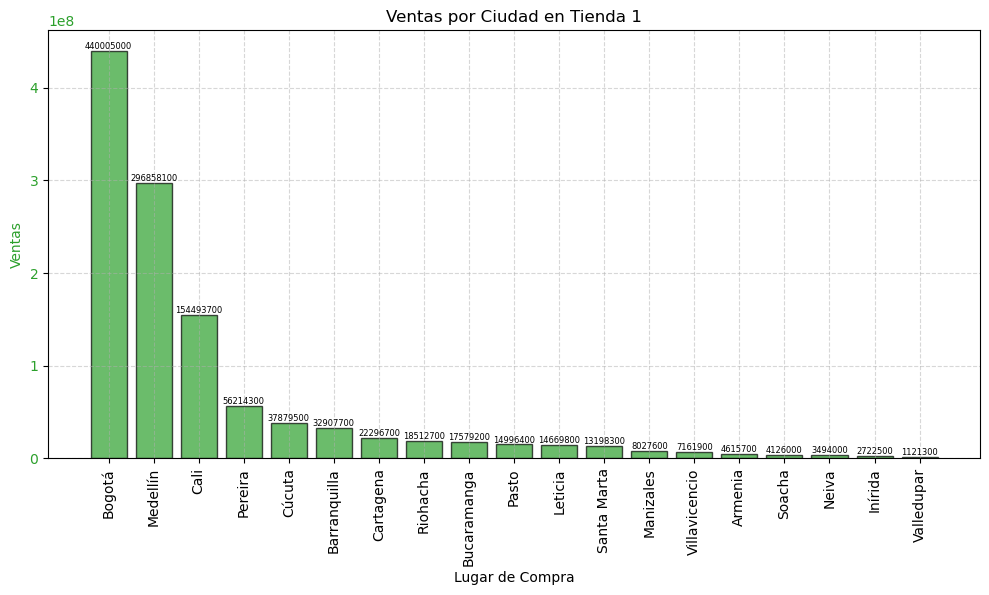

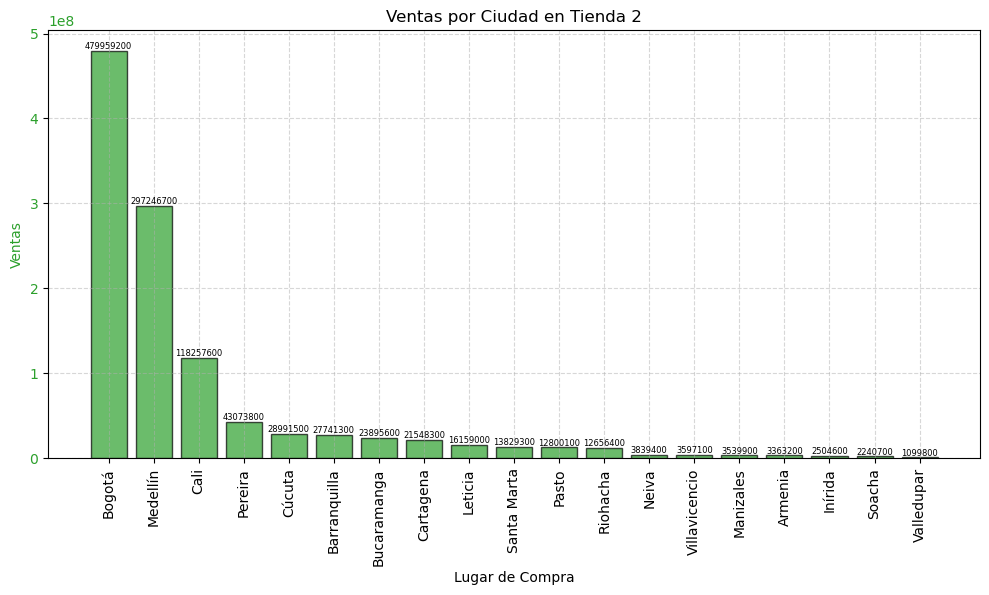

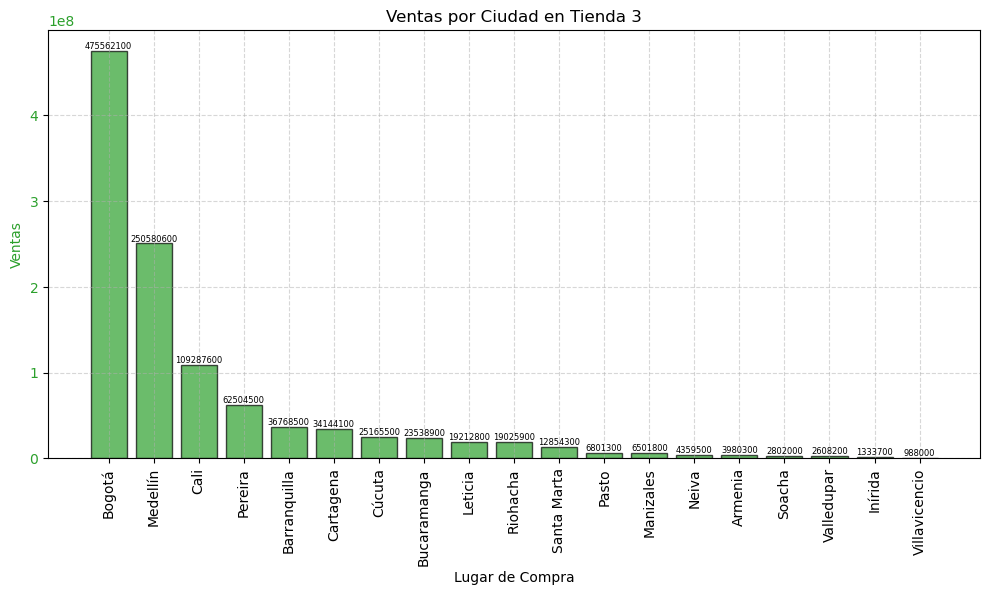

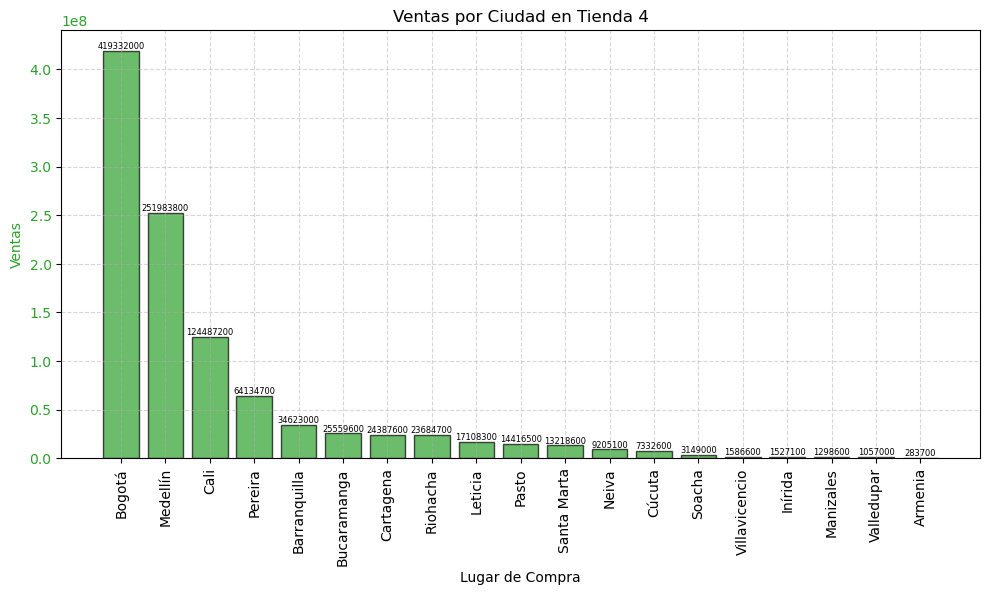

In [7]:
ciudades = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4,
}

for i, (tienda_name, df) in enumerate(ciudades.items()):
    lugar_de_compra = df.groupby('Lugar de Compra').aggregate(Ventas=('Precio', 'sum'))
    lugar_de_compra.sort_values(by='Ventas', ascending=False, inplace=True)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plotear ventas
    color = 'tab:green'
    ax.set_xlabel('Lugar de Compra')
    ax.set_ylabel('Ventas', color=color)
    ax.bar(lugar_de_compra.index, lugar_de_compra['Ventas'], color=color, alpha=0.7,  edgecolor='black')
    ax.tick_params(axis='y', labelcolor=color)
    
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', fontsize=6, rotation=0, label_type='edge')


    # Establecer los ticks
    ax.set_xticks(range(len(lugar_de_compra)))
    # Rotar las etiquetas del eje x (ciudades)
    ax.set_xticklabels(lugar_de_compra.index, rotation=90, ha='center')
    
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.title(f'Ventas por Ciudad en {tienda_name}')
    plt.show()

# 2. Ventas por categoría

En este debes calcular la <b>cantidad de productos vendidos por categoría</b> en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [8]:
# Agrupar los datos por Tienda y Categoría del Producto, luego sumar el precio y contar la cantidad de productos por categoría
total_por_tienda_y_categoria = {
    'Tienda 1': tienda.groupby('Categoría del Producto').aggregate(Productos_vendidos=('Producto', 'count'), Precio =('Precio', 'sum')),
    'Tienda 2': tienda2.groupby('Categoría del Producto').aggregate(Productos_vendidos=('Producto', 'count'), Precio =('Precio', 'sum')),
    'Tienda 3': tienda3.groupby('Categoría del Producto').aggregate(Productos_vendidos=('Producto', 'count'), Precio =('Precio', 'sum')),
    'Tienda 4': tienda4.groupby('Categoría del Producto').aggregate(Productos_vendidos=('Producto', 'count'), Precio =('Precio', 'sum'))
}

# Imprimir el valor total por categoría del producto, por tienda
for tienda_name, grupo in total_por_tienda_y_categoria.items():
    print(f'{tienda_name}')
    for categoria, datos in grupo.iterrows():
        print(f'{categoria}, Total Vendido: ${datos["Precio"]:,.2f}, Cantidad de Productos Vendidos: {datos["Productos_vendidos"]:.2f}')
    print("\n")




Tienda 1
Artículos para el hogar, Total Vendido: $12,698,400.00, Cantidad de Productos Vendidos: 171.00
Deportes y diversión, Total Vendido: $39,290,000.00, Cantidad de Productos Vendidos: 284.00
Electrodomésticos, Total Vendido: $363,685,200.00, Cantidad de Productos Vendidos: 312.00
Electrónicos, Total Vendido: $429,493,500.00, Cantidad de Productos Vendidos: 448.00
Instrumentos musicales, Total Vendido: $91,299,000.00, Cantidad de Productos Vendidos: 182.00
Juguetes, Total Vendido: $17,995,700.00, Cantidad de Productos Vendidos: 324.00
Libros, Total Vendido: $8,784,900.00, Cantidad de Productos Vendidos: 173.00
Muebles, Total Vendido: $187,633,700.00, Cantidad de Productos Vendidos: 465.00


Tienda 2
Artículos para el hogar, Total Vendido: $14,746,900.00, Cantidad de Productos Vendidos: 181.00
Deportes y diversión, Total Vendido: $34,744,500.00, Cantidad de Productos Vendidos: 275.00
Electrodomésticos, Total Vendido: $348,567,800.00, Cantidad de Productos Vendidos: 305.00
Electrónic

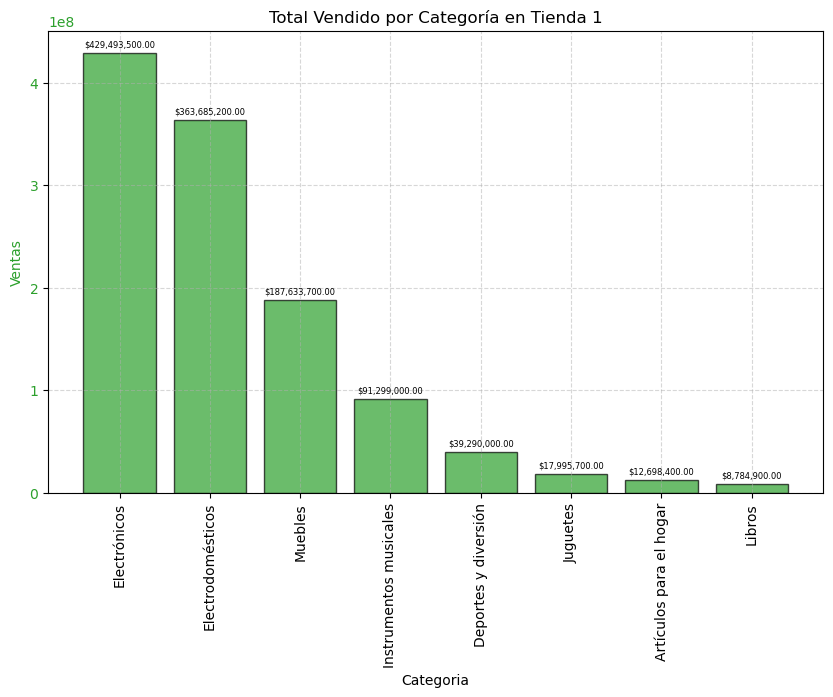

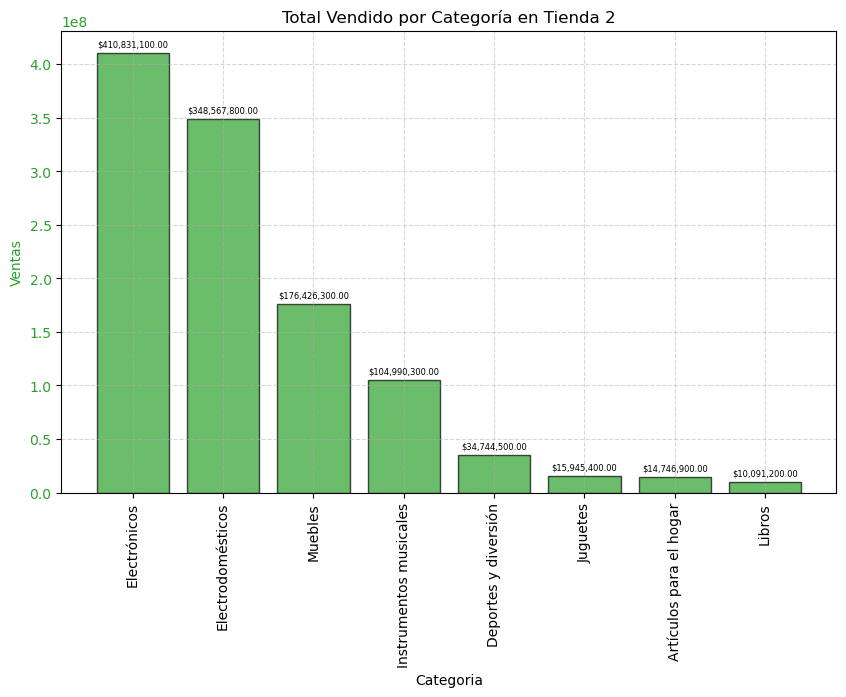

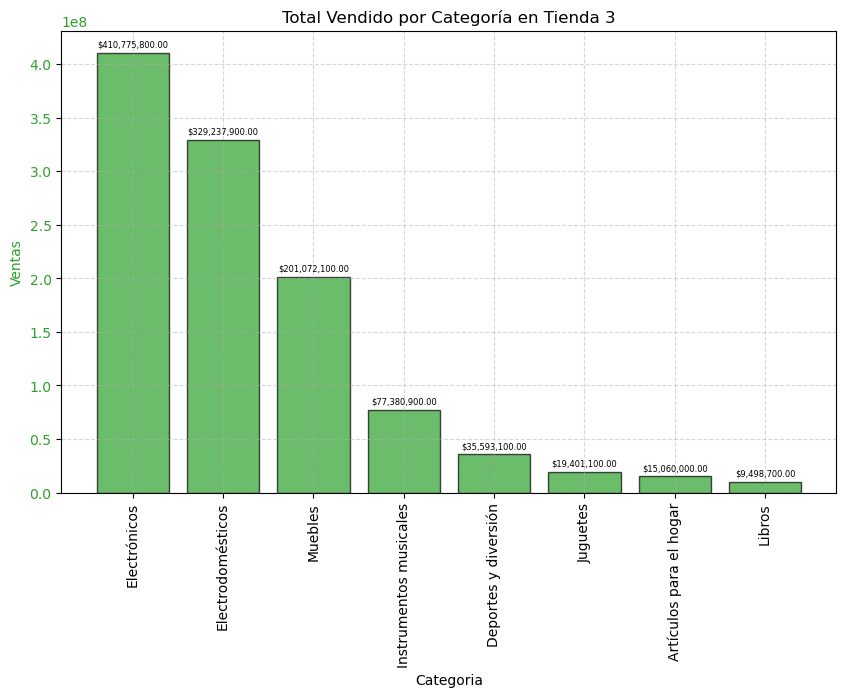

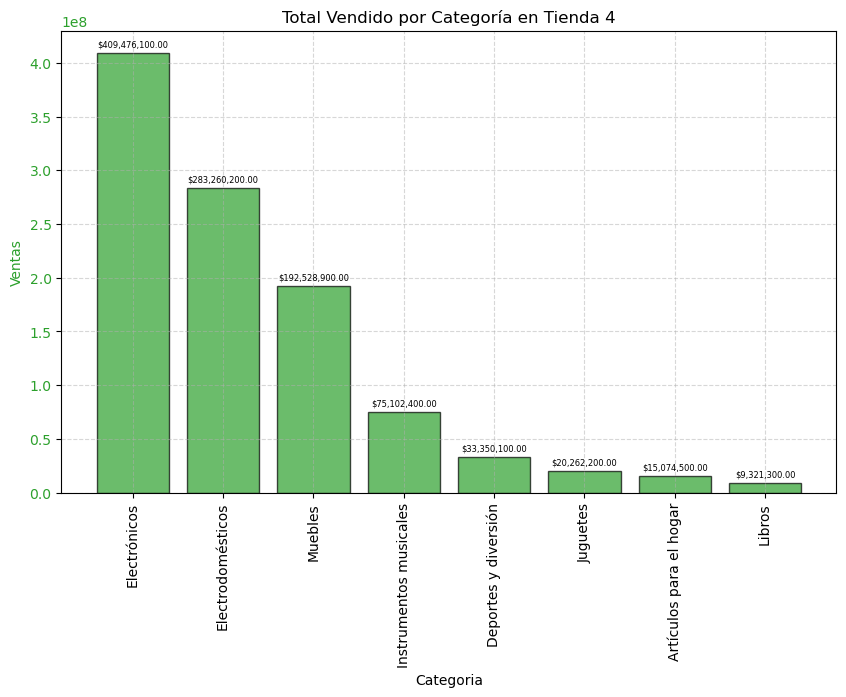

In [9]:
for i, (tienda_name, df) in enumerate(total_por_tienda_y_categoria.items()):
    # Ordenar los datos por precio en orden descendente
    df.sort_values(by='Precio', ascending=False, inplace=True)
    
    # Crear la figura y el eje de gráficos
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Graficar el total vendido
    color = 'tab:green'
    ax.set_xlabel('Categoria')
    ax.set_ylabel('Ventas', color=color)
    bars = ax.bar(df.index, df['Precio'], color=color, alpha=0.7, edgecolor='black')
    ax.tick_params(axis='y', labelcolor=color)


        # Agregar etiquetas de barras con rotación diagonal
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'${height:,.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', size=6)

    
    # Establecer los ticks y rotar las etiquetas del eje x (categorías)
    ax.set_xticks(range(len(df)))
    ax.set_xticklabels(df.index, rotation=90, ha='center')
    
    # # Ajustar el espacio entre barras
    # ax.bar_label(bars, padding=3)

    plt.grid(True, linestyle='--', alpha=0.5)
    plt.title(f'Total Vendido por Categoría en {tienda_name}')
    plt.show()

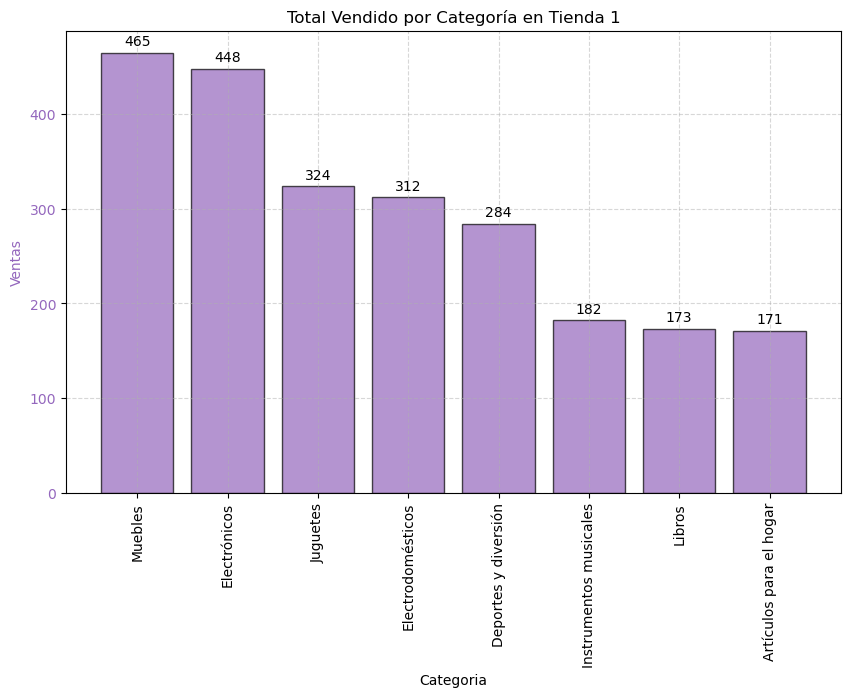

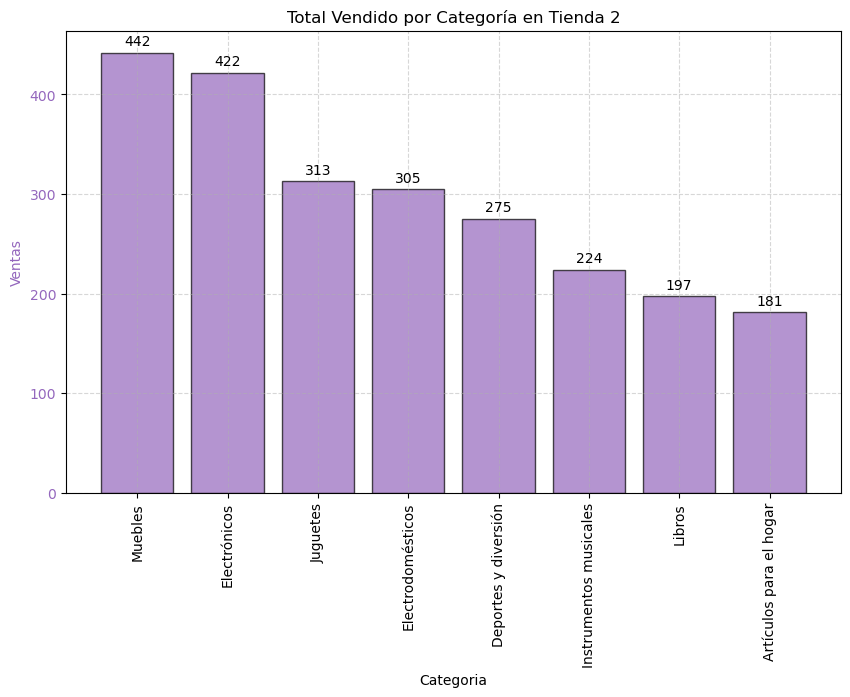

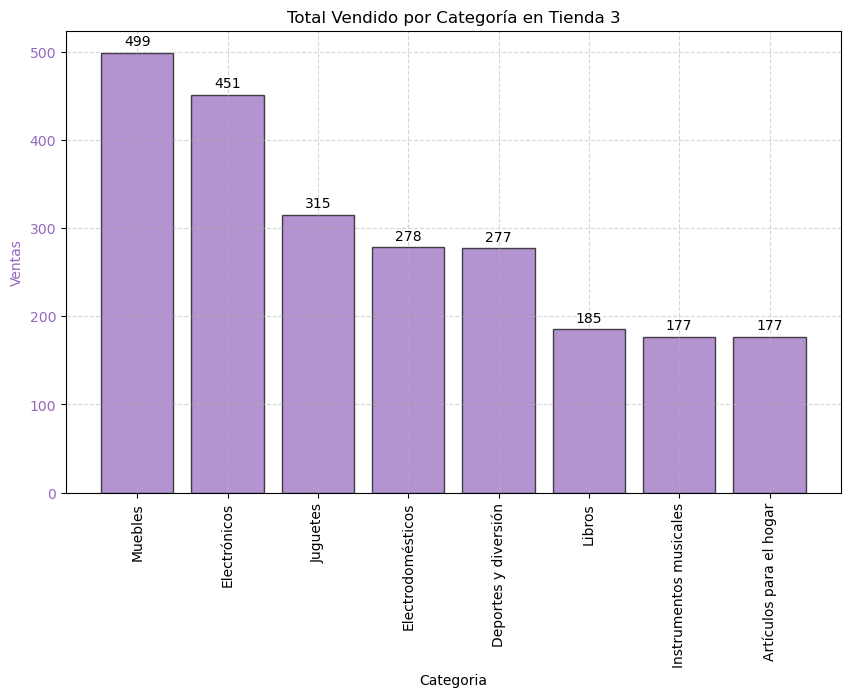

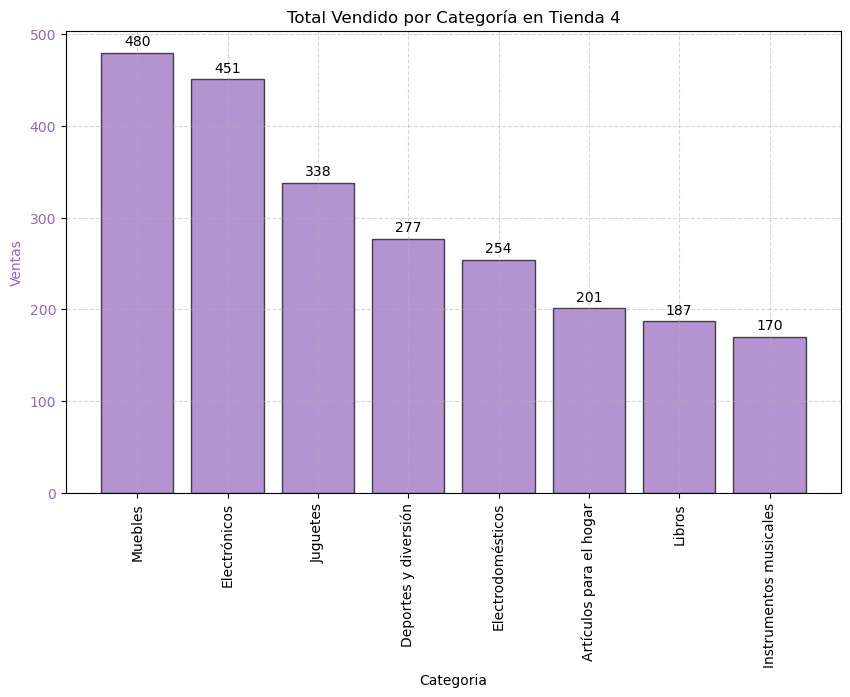

In [10]:
for i, (tienda_name, df) in enumerate(total_por_tienda_y_categoria.items()):
    # Ordenar los datos por precio en orden descendente
    df.sort_values(by='Productos_vendidos', ascending=False, inplace=True)
    
    # Crear la figura y el eje de gráficos
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Graficar el total vendido
    color = 'tab:purple'
    ax.set_xlabel('Categoria')
    ax.set_ylabel('Ventas', color=color)
    bars = ax.bar(df.index, df['Productos_vendidos'], color=color, alpha=0.7, edgecolor='black')
    ax.tick_params(axis='y', labelcolor=color)


        # Agregar etiquetas de barras con rotación diagonal
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:,.0f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', size=10)

    
    # Establecer los ticks y rotar las etiquetas del eje x (categorías)
    ax.set_xticks(range(len(df)))
    ax.set_xticklabels(df.index, rotation=90, ha='center')
    
    # # Ajustar el espacio entre barras
    # ax.bar_label(bars, padding=3)

    plt.grid(True, linestyle='--', alpha=0.5)
    plt.title(f'Total Vendido por Categoría en {tienda_name}')
    plt.show()

In [11]:
# Mostrar los productos mas vendidos por tienda
for tienda_name, grupo in total_por_tienda_y_categoria.items():
    print(f'{tienda_name}')
    print(grupo.sort_values(by='Productos_vendidos', ascending=False))
    print("\n")

Tienda 1
                         Productos_vendidos         Precio
Categoría del Producto                                    
Muebles                                 465 187,633,700.00
Electrónicos                            448 429,493,500.00
Juguetes                                324  17,995,700.00
Electrodomésticos                       312 363,685,200.00
Deportes y diversión                    284  39,290,000.00
Instrumentos musicales                  182  91,299,000.00
Libros                                  173   8,784,900.00
Artículos para el hogar                 171  12,698,400.00


Tienda 2
                         Productos_vendidos         Precio
Categoría del Producto                                    
Muebles                                 442 176,426,300.00
Electrónicos                            422 410,831,100.00
Juguetes                                313  15,945,400.00
Electrodomésticos                       305 348,567,800.00
Deportes y diversión                

# 3. Calificación promedio de la tienda


En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [12]:
tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,"164,300.00","6,900.00",16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.61,-74.08
1,Mesa de comedor,Muebles,"192,300.00","8,400.00",18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25,-75.56
2,Juego de mesa,Juguetes,"209,600.00","15,900.00",15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.40,-75.51
3,Microondas,Electrodomésticos,"757,500.00","41,000.00",03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.44,-76.52
4,Silla de oficina,Muebles,"335,200.00","20,200.00",07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25,-75.56


In [13]:
# Clasificacion por tienda
calificacines = {
    'Tienda 1': tienda['Calificación'].mean(),
    'Tienda 2': tienda2['Calificación'].mean(),
    'Tienda 3': tienda3['Calificación'].mean(),
    'Tienda 4': tienda4['Calificación'].mean()
}
print(f'Tienda calificada como:')
for i in calificacines:
    print(f'{i}, Calificación: {calificacines[i]}')

Tienda calificada como:
Tienda 1, Calificación: 3.976685036032217
Tienda 2, Calificación: 4.037303942348453
Tienda 3, Calificación: 4.048325561678677
Tienda 4, Calificación: 3.9957591178965224


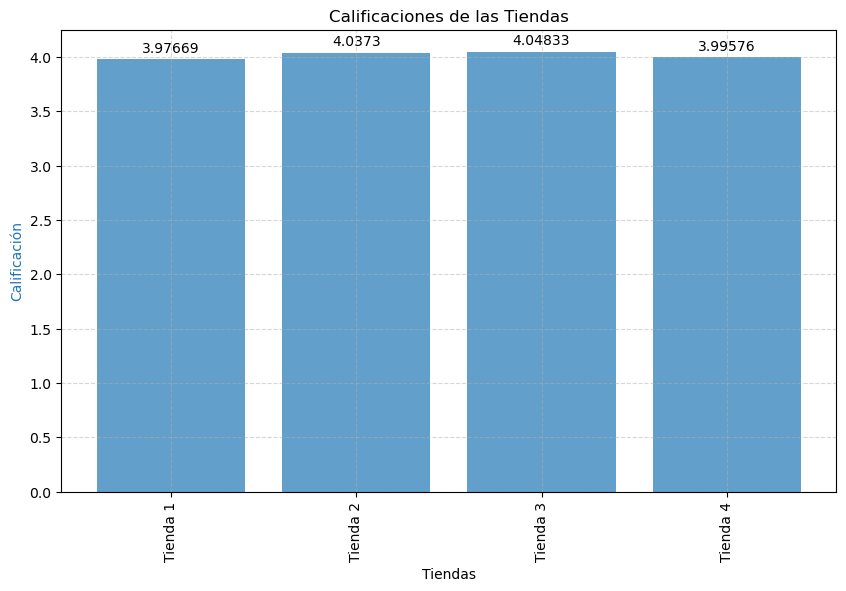

In [14]:
import matplotlib.pyplot as plt

calificacines = {
    'Tienda 1': tienda['Calificación'].mean(),
    'Tienda 2': tienda2['Calificación'].mean(),
    'Tienda 3': tienda3['Calificación'].mean(),
    'Tienda 4': tienda4['Calificación'].mean()
}

# Crear la figura y el eje de gráficos
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar las calificaciones
color = 'tab:blue'
ax.set_xlabel('Tiendas')
ax.set_ylabel('Calificación', color=color)
bars = ax.bar(calificacines.keys(), calificacines.values(), color=color, alpha=0.7)

# Establecer los ticks y rotar las etiquetas del eje x (categorías)
ax.set_xticks(range(len(calificacines)))
ax.set_xticklabels(list(calificacines.keys()), rotation=90, ha='center')

# Ajustar el espacio entre barras
ax.bar_label(bars, padding=3)

plt.grid(True, linestyle='--', alpha=0.5)
plt.title('Calificaciones de las Tiendas')
plt.show()

In [15]:
# Calificacion por producto por tienda ordenado por el mas calificado
calificacines = {
    'Tienda 1': tienda.groupby('Categoría del Producto').aggregate({'Calificación': 'mean'}),
    'Tienda 2': tienda2.groupby('Categoría del Producto').aggregate({'Calificación': 'mean'}),
    'Tienda 3': tienda3.groupby('Categoría del Producto').aggregate({'Calificación': 'mean'}),
    'Tienda 4': tienda4.groupby('Categoría del Producto').aggregate({'Calificación': 'mean'})
}
print(f'Tienda calificada como:')
for i, grupo in calificacines.items():
    print(f'{i}')
    print(grupo.sort_values(by='Calificación', ascending=False ))
    print("\n")


Tienda calificada como:
Tienda 1
                         Calificación
Categoría del Producto               
Juguetes                         4.08
Instrumentos musicales           4.05
Electrodomésticos                4.03
Electrónicos                     4.00
Libros                           3.98
Muebles                          3.95
Deportes y diversión             3.90
Artículos para el hogar          3.75


Tienda 2
                         Calificación
Categoría del Producto               
Muebles                          4.09
Electrodomésticos                4.07
Artículos para el hogar          4.07
Deportes y diversión             4.07
Instrumentos musicales           4.04
Juguetes                         4.03
Electrónicos                     3.97
Libros                           3.95


Tienda 3
                         Calificación
Categoría del Producto               
Juguetes                         4.20
Muebles                          4.10
Artículos para el hogar          

# 4. Productos más y menos vendidos

In [16]:
# Producto mas vendido por Tienda

productos_mas_vendidos = {
    'Tienda 1': tienda.groupby('Producto').aggregate(Cantidad =('Producto', 'count'), Total_Precio = ('Precio', 'sum')),
    'Tienda 2': tienda2.groupby('Producto').aggregate(Cantidad =('Producto', 'count'), Total_Precio = ('Precio', 'sum')),
    'Tienda 3': tienda3.groupby('Producto').aggregate(Cantidad =('Producto', 'count'), Total_Precio = ('Precio', 'sum')),
    'Tienda 4': tienda4.groupby('Producto').aggregate(Cantidad =('Producto', 'count'), Total_Precio = ('Precio', 'sum'))   
}

for tienda_name, grupo in productos_mas_vendidos.items():
    print(f'{tienda_name}')
    print(grupo.sort_values(by='Cantidad', ascending=False).head(5))
    print("\n")
    

Tienda 1
                  Cantidad   Total_Precio
Producto                                 
Armario                 60  29,462,300.00
TV LED UHD 4K           60 142,150,200.00
Microondas              60  34,761,500.00
Secadora de ropa        58  59,062,400.00
Mesa de noche           56  15,679,600.00


Tienda 2
                           Cantidad  Total_Precio
Producto                                         
Iniciando en programación        65  3,127,800.00
Microondas                       62 36,192,000.00
Batería                          61 46,175,300.00
Pandereta                        58  3,725,100.00
Guitarra acústica                58 18,648,400.00


Tienda 3
                 Cantidad  Total_Precio
Producto                               
Kit de bancas          57 16,699,800.00
Mesa de comedor        56 14,326,100.00
Cama king              56 38,834,700.00
Set de ollas           55  8,696,500.00
Mesa de noche          55 15,365,500.00


Tienda 4
                           Cantida

In [17]:
# Producto mas vendido por Tienda
productos_mas_vendidos = {
    'Tienda 1': tienda.groupby('Producto').aggregate(Cantidad =('Producto', 'count'), Total_Precio = ('Precio', 'sum')),
    'Tienda 2': tienda2.groupby('Producto').aggregate(Cantidad =('Producto', 'count'), Total_Precio = ('Precio', 'sum')),
    'Tienda 3': tienda3.groupby('Producto').aggregate(Cantidad =('Producto', 'count'), Total_Precio = ('Precio', 'sum')),
    'Tienda 4': tienda4.groupby('Producto').aggregate(Cantidad =('Producto', 'count'), Total_Precio = ('Precio', 'sum'))   
}

for tienda_name, grupo in productos_mas_vendidos.items():
    print(f'{tienda_name}')
    print(grupo.sort_values(by='Cantidad', ascending=True).head(5))
    print("\n")

Tienda 1
                             Cantidad  Total_Precio
Producto                                           
Auriculares con micrófono          33  4,730,800.00
Celular ABXY                       33 32,651,000.00
Olla de presión                    35  2,629,300.00
Pandereta                          36  2,238,900.00
Ciencia de datos con Python        39  2,063,600.00


Tienda 2
                 Cantidad  Total_Precio
Producto                               
Juego de mesa          32  5,811,900.00
Impresora              34 10,385,300.00
Mesa de comedor        34  8,637,500.00
Sillón                 35  8,413,500.00
Auriculares            37  3,569,600.00


Tienda 3
                         Cantidad  Total_Precio
Producto                                       
Bloques de construcción        35  1,237,200.00
Set de vasos                   36  1,210,700.00
Mochila                        36  3,547,000.00
Microondas                     36 19,153,600.00
Vaso térmico                   38  1,

# 5. Envío promedio por tienda

In [18]:
# Creando un diccionario con el total de los gastos de envio por tienda
gastos_por_tienda = {
    'Tienda 1': tienda['Costo de envío'].sum(),
    'Tienda 2': tienda2['Costo de envío'].sum(),
    'Tienda 3': tienda3['Costo de envío'].sum(),
    'Tienda 4': tienda4['Costo de envío'].sum()
}
for i in gastos_por_tienda:
    print(f'La {i} a generado un gastos de envio total de ${gastos_por_tienda[i]:,.2f}')

La Tienda 1 a generado un gastos de envio total de $61,377,900.00
La Tienda 2 a generado un gastos de envio total de $59,485,100.00
La Tienda 3 a generado un gastos de envio total de $58,516,600.00
La Tienda 4 a generado un gastos de envio total de $55,317,400.00


In [19]:
# Calcular el promedio de envío por tienda
promedios_envio = {
    'Tienda 1': tienda['Costo de envío'].mean(),
    'Tienda 2': tienda2['Costo de envío'].mean(),
    'Tienda 3': tienda3['Costo de envío'].mean(),
    'Tienda 4': tienda4['Costo de envío'].mean()
}

print("Costo de envío promedio por tienda:")
for tienda_name, promedio in promedios_envio.items():
    print(f"{tienda_name}: ${promedio:,.2f}")

Costo de envío promedio por tienda:
Tienda 1: $26,018.61
Tienda 2: $25,216.24
Tienda 3: $24,805.68
Tienda 4: $23,459.46


# 6. Generando gráfico -- Adicionales

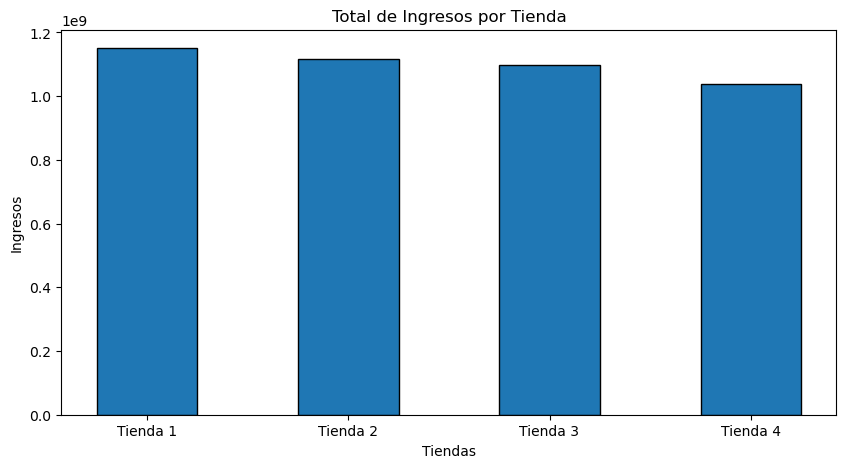

In [20]:

# Plot total_por_tienda
plt.figure(figsize=(10, 5))
plt.bar(total_por_tienda.keys(), total_por_tienda.values(), width=0.5, edgecolor='black')
plt.xlabel('Tiendas')
plt.ylabel('Ingresos')    
plt.title('Total de Ingresos por Tienda')
plt.show()  

C:\Users\wmalv\AppData\Local\Temp\ipykernel_30312\2711600161.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ventas_por_tienda_mes = df_total.groupby(['Tienda', pd.Grouper(key='Fecha de Compra', freq='M')])['Precio'].sum().unstack(level=0)


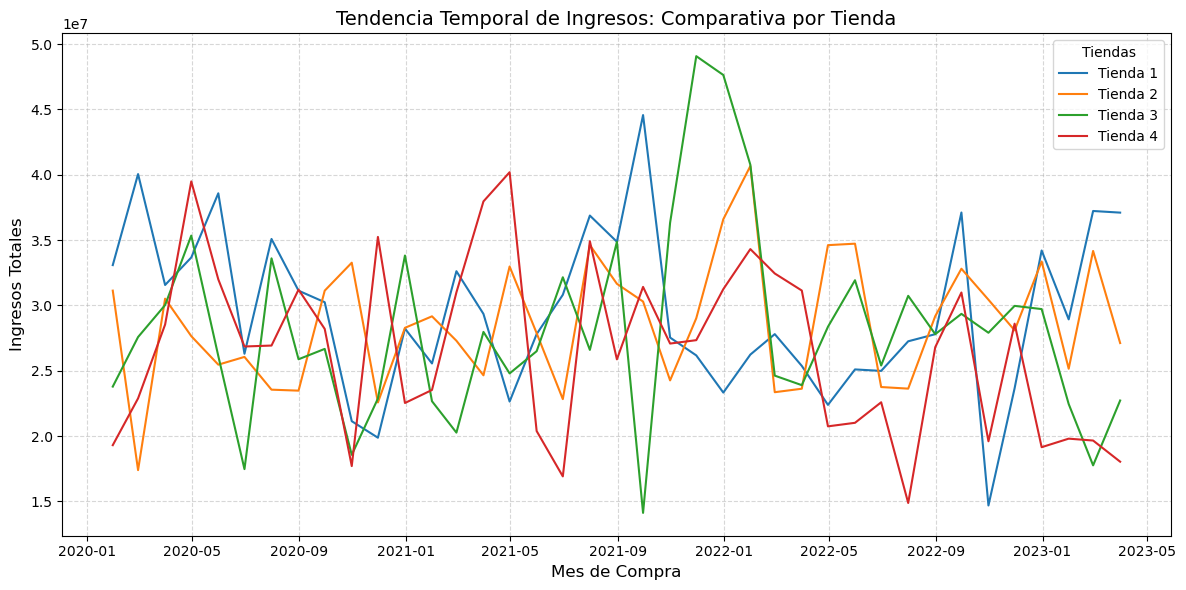

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Aseguramos que cada tienda tenga su nombre identificador
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# 2. Unimos todas las tiendas en un solo DataFrame
df_total = pd.concat([tienda, tienda2, tienda3, tienda4])

# 3. Convertimos la columna de fecha al formato correcto de Python
df_total['Fecha de Compra'] = pd.to_datetime(df_total['Fecha de Compra'], dayfirst=True)

# 4. Agrupamos por Tienda y por Mes, sumando los ingresos (Precio)
# Usamos un grouper para agrupar por mes ('M')
ventas_por_tienda_mes = df_total.groupby(['Tienda', pd.Grouper(key='Fecha de Compra', freq='M')])['Precio'].sum().unstack(level=0)

# 5. Graficamos
plt.figure(figsize=(12, 6))

# Iteramos sobre las columnas (que ahora son las tiendas) para dibujar cada línea
for columna in ventas_por_tienda_mes.columns:
    plt.plot(ventas_por_tienda_mes.index, ventas_por_tienda_mes[columna], label=columna)

plt.title('Tendencia Temporal de Ingresos: Comparativa por Tienda', fontsize=14)
plt.xlabel('Mes de Compra', fontsize=12)
plt.ylabel('Ingresos Totales', fontsize=12)
plt.legend(title='Tiendas')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

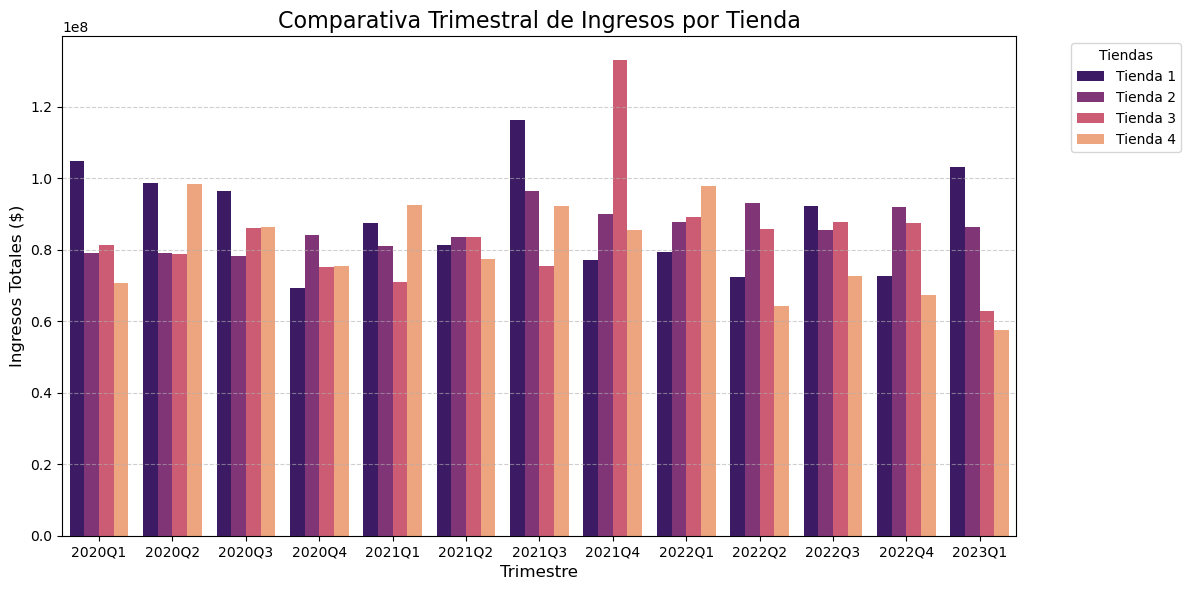

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Aseguramos que cada tienda tenga su nombre identificador
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# 2. Unimos todas las tiendas
df_total = pd.concat([tienda, tienda2, tienda3, tienda4])

# 3. Convertimos la fecha al formato correcto
df_total['Fecha de Compra'] = pd.to_datetime(df_total['Fecha de Compra'], dayfirst=True)

# 4. Creamos una columna para el Trimestre (Quarter)
# 'Q' extraerá el trimestre y el año (ej. 2021Q1)
df_total['Trimestre'] = df_total['Fecha de Compra'].dt.to_period('Q').astype(str)

# 5. Agrupamos por Trimestre y Tienda para sumar ingresos
ventas_trimestrales = df_total.groupby(['Trimestre', 'Tienda'])['Precio'].sum().reset_index()

# 6. Graficamos
plt.figure(figsize=(12, 6))
sns.barplot(
    data=ventas_trimestrales.sort_values('Trimestre'), 
    x='Trimestre', 
    y='Precio', 
    hue='Tienda', 
    palette='magma'
)

plt.title('Comparativa Trimestral de Ingresos por Tienda', fontsize=16)
plt.xlabel('Trimestre', fontsize=12)
plt.ylabel('Ingresos Totales ($)', fontsize=12)
plt.legend(title='Tiendas', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

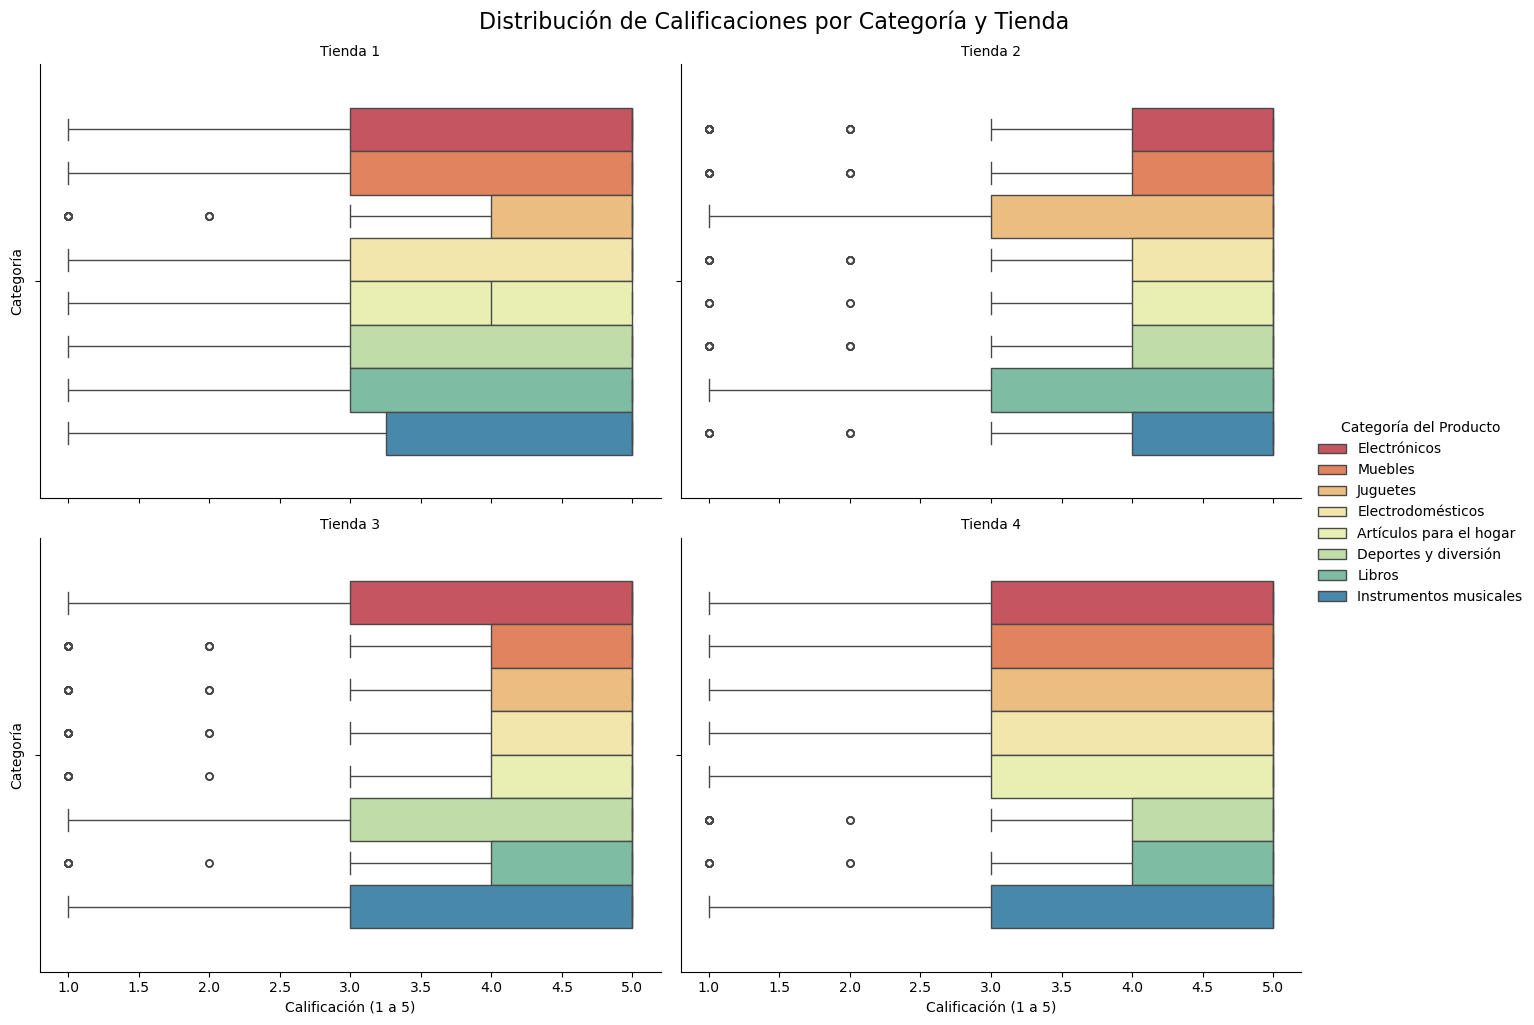

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Agregamos una columna identificadora a cada dataframe antes de unirlos
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# 2. Concatenamos todos los datos en un solo DataFrame global
df_total = pd.concat([tienda, tienda2, tienda3, tienda4])

# 3. Creamos el Box Plot segmentado por tienda
# Usamos 'col' para que cree una gráfica distinta por cada valor en la columna 'Tienda'
g = sns.catplot(
    data=df_total, 
    x='Calificación', 
    hue='Categoría del Producto', 
    col='Tienda', 
    kind='box', 
    col_wrap=2,      # Organiza las gráficas en 2 columnas (2 arriba y 2 abajo)
    height=5, 
    aspect=1.3,
    palette='Spectral'
)

# Ajustamos los títulos y etiquetas para que se vean profesionales
g.set_titles("{col_name}")
g.set_axis_labels("Calificación (1 a 5)", "Categoría")
g.fig.suptitle('Distribución de Calificaciones por Categoría y Tienda', y=1.02, fontsize=16)

plt.show()

In [24]:

result_tienda = tienda.groupby('Vendedor')['Precio'].count()
result_tienda2 = tienda2.groupby('Vendedor')['Precio'].count()
result_tienda3 = tienda3.groupby('Vendedor')['Precio'].count()
result_tienda4 = tienda4.groupby('Vendedor')['Precio'].count()

resultados = pd.concat([result_tienda, result_tienda2, result_tienda3, result_tienda4], axis=1)
resultados.columns = ['tienda', 'tienda2', 'tienda3', 'tienda4']

print(resultados)

                 tienda  tienda2  tienda3  tienda4
Vendedor                                          
Beatriz Morales     165      170      158      157
Blanca Ramirez      180      166      163      170
Camila Rivera       167      161      173      166
Felipe Santos       170      166      169      196
Izabela de León     197      195      171      181
Juan Fernandez      163      163      184      184
Juliana Costa       169      179      165      164
Lucas Olivera       166      169      166      173
Maria Alfonso       173      170      186      150
Mariana Herrera     156      157      160      183
Pedro Gomez         169      171      161      154
Rafael Acosta       171      149      161      144
Santiago Silva      144      161      171      174
Ángel Rodriguez     169      182      171      162


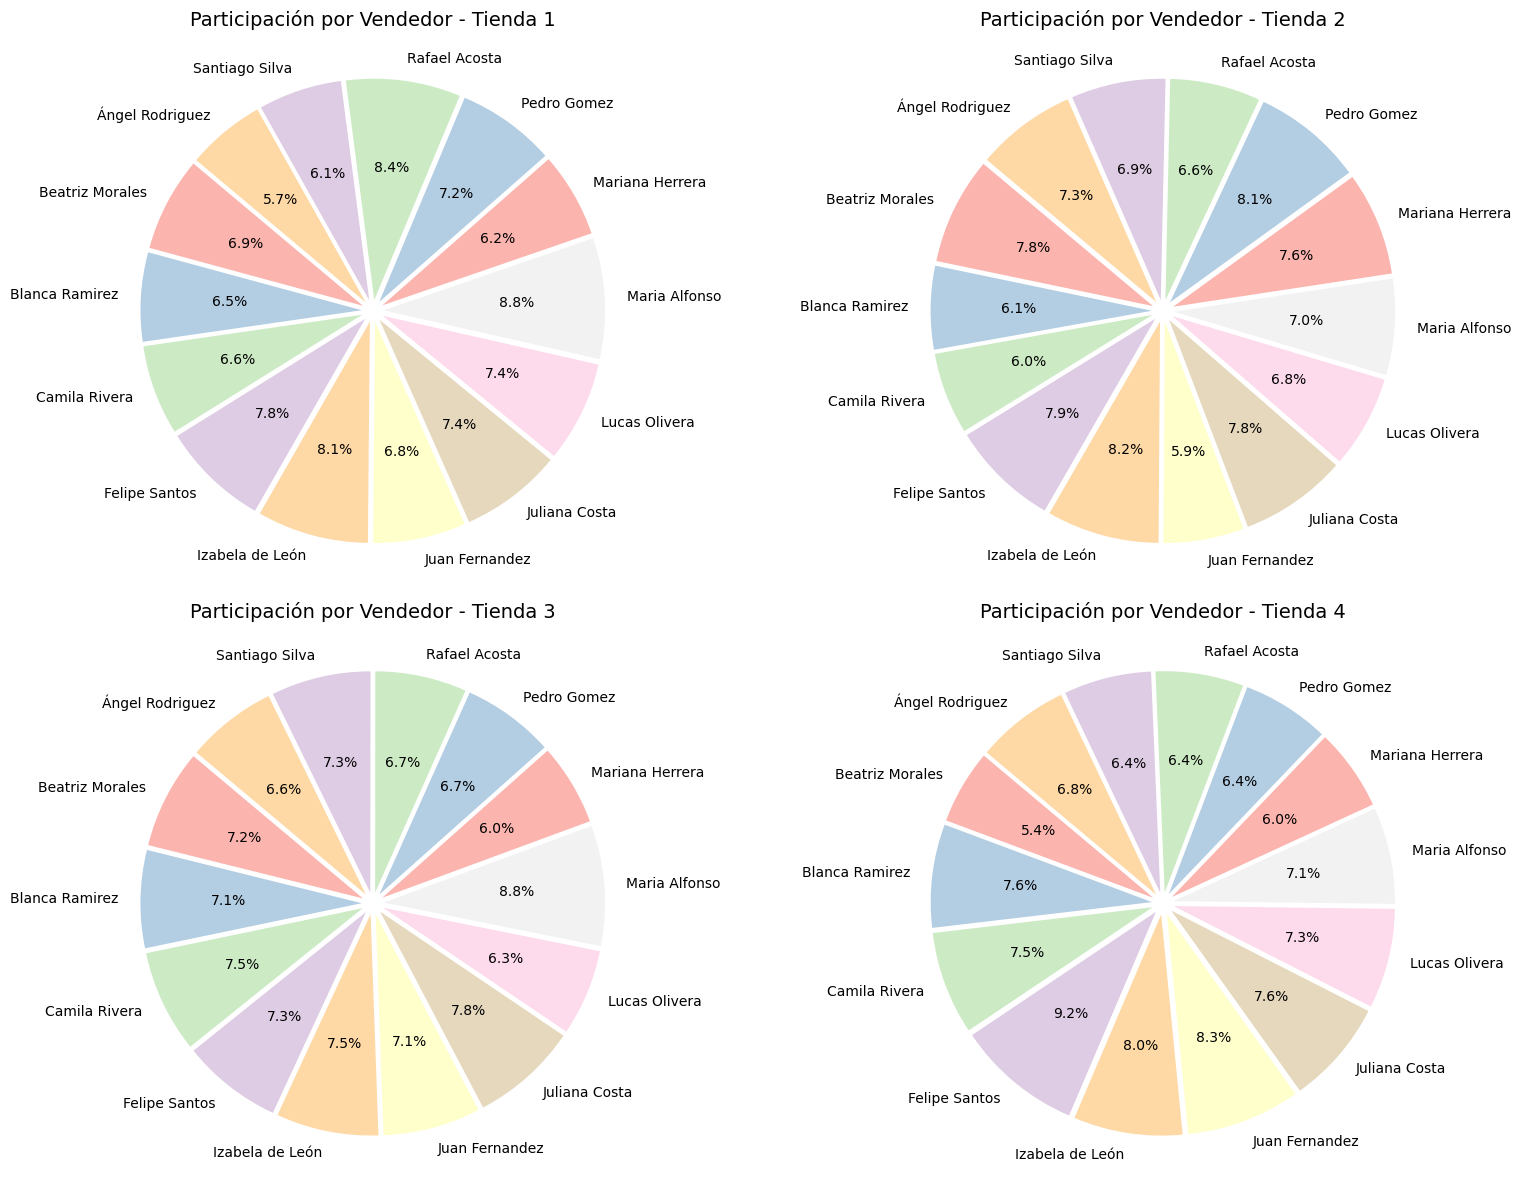

In [25]:
import matplotlib.pyplot as plt

# Lista de tus DataFrames y sus etiquetas
tiendas_lista = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Creamos una figura con 2 filas y 2 columnas
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten() # Aplanamos la matriz de ejes para iterar fácilmente

for i, df in enumerate(tiendas_lista):
    # Agrupamos por Vendedor y sumamos el Precio
    ventas_vendedor = df.groupby('Vendedor')['Precio'].sum()
    
    # Generamos el gráfico de torta
    axes[i].pie(
        ventas_vendedor, 
        labels=ventas_vendedor.index, 
        autopct='%1.1f%%',   # Muestra el porcentaje con un decimal
        startangle=140,      # Rota el inicio del gráfico
        colors=plt.cm.Pastel1.colors, # Paleta de colores suaves
        explode=[0.05] * len(ventas_vendedor) # Separa un poco las tajadas
    )
    
    axes[i].set_title(f'Participación por Vendedor - {nombres_tiendas[i]}', fontsize=14)

# Ajuste final para que no se encimen los títulos
plt.tight_layout()
plt.show()

# Informe Final: Análisis de Viabilidad y Recomendación de Venta - AluraStore Latam

## 1. Introducción

<p>El presente informe tiene como objetivo evaluar el desempeño operativo y comercial de las cuatro sucursales de <i><b>AluraStore Latam</b></i> para determinar cuál de ellas representa la mejor oportunidad de negocio para el <i><b>Sr. Juan</b></i>. El análisis se basa en cinco pilares fundamentales: 
<ul>
    <li>Volumen de ingresos, </li>
    <li>Veficiencia logística (envíos), </li>
    <li>Satisfacción del cliente (calificaciones), </li>
    <li>dominancia de categorías y </li>
    <li>rotación de productos específicos.</li>
</ul>
</p>

## 2. Desarrollo del Análisis

### 2.1 Desempeño Financiero y Operativo

Aunque las tiendas presentan una estructura de ventas muy similar, existen matices importantes en su eficiencia:
 * <i>Ingresos Totales</i>: La <b>Tienda 1</b> es la líder indiscutible en facturación bruta con <b>$1,150,880,400</b>. No obstante, este liderazgo viene acompañado de un costo: es la tienda con el costo de envío promedio más alto <b>($26,018)</b> y la calificación más baja de los clientes <b>(3.97)</b>.
 * <i>Eficiencia Logística</i>: La <b>Tienda 4</b> destaca por tener los costos de envío más optimizados (<b>$23,459</b> en promedio), lo que sugiere una mejor ubicación geográfica o mejores convenios de transporte. Sin embargo, es la que menos ingresos genera en total.

### 2.2 Calidad y Satisfacción del Cliente

La satisfacción del cliente es el indicador más saludable para un negocio a largo plazo:


 * La __Tienda 3__ ostenta la calificación promedio más alta __(4.048)__. Esto indica que, a pesar de vender productos similares a las demás, sus procesos de entrega o estado de los productos generan mayor confianza. Además, sus costos de envío son los segundos más bajos __($24,805)__, logrando un equilibrio entre ahorro y calidad.

### 2.3 Análisis de Productos y Categorías

Como bien se observó, las tiendas operan bajo un modelo de "depósito" de gran escala:


 * _Categoría Reina_: En las cuatro tiendas, __"Muebles"__ es la categoría más vendida (llegando a __499__ unidades en la __Tienda 3__).

 * _Categoría Débil_: __"Artículos para el hogar"__ e __"Instrumentos musicales"__ suelen ocupar los últimos lugares en rotación.

 * _Producto Estrella_: Mientras que la __Tienda 1__ se especializa en volumen de Armarios __(60 unidades)__ , la __Tienda 3__ destaca en __Kits de bancas__.

## 3. Conclusión y Recomendación

Tras evaluar los datos, se recomienda al Sr. Juan que la __decisión de inversión__ se enfoque en la __Tienda 3__.

__Justificación__:

 * _Sostenibilidad_: Posee la mejor reputación ante los clientes __(mayor calificación)__. Un cliente satisfecho tiene un menor costo de adquisición a futuro.
 * _Equilibrio Operativo_: __Es la más eficiente__ después de la Tienda 4 en costos de envío , pero con una facturación significativamente más robusta.
 * _Potencial de Crecimiento_: Al dominar la categoría de Muebles (su categoría más vendida con 499 unidades)  y mantener los __mejores estándares de calidad__, es la sucursal que mejor puede resistir la entrada de nuevos competidores.

Por otra parte, aunque la Tienda 1 es la que más dinero recibe, es la que tiene los "síntomas" de ser la más problemática a largo plazo. Por lo que la segunda recomendacion seria la __decisión de Venta__ o enfoque en la __Tienda 1__.

__Justificación__:

 * _Baja satisfacción_: __Tiene la calificación más baja de todas (3.97)__. Esto significa que los clientes están menos contentos que en las demás tiendas.
 * _Costos logísticos ineficientes_: Es la tienda que __genera más gastos de envío totales ($61,377,900)__ y tiene el promedio por envío más caro ($26,018).
 * _Margen de beneficio en riesgo_: Al gastar más en logística y tener clientes menos satisfechos, es probable que su beneficio real sea menor que el de las otras, a pesar de facturar más.

Mientras que la Tienda 1 es un "gigante pesado" con costos altos y clientes menos satisfechos, la Tienda 3 representa un modelo de negocio optimizado y saludable.
Tienda 1 parece un depósito saturado que está perdiendo el control de su calidad y sus costos de envío.

# Extra - desempeño Geografico

In [ ]:
import folium
from folium.plugins import HeatMap
import pandas as pd

# 1. Unimos los datos (asumiendo que ya tienes tienda, tienda2, tienda3 y tienda4 cargados)
df_total = pd.concat([tienda, tienda2, tienda3, tienda4])

# 2. Creamos el objeto mapa centrado en las coordenadas promedio de Colombia
# 'zoom_start=6' es ideal para ver todo el país
mapa = folium.Map(location=[4.5708, -74.2973], zoom_start=6, tiles='OpenStreetMap')

# 3. Preparamos los datos para el HeatMap
# Folium necesita una lista de listas: [[lat, lon], [lat, lon]...]
# Eliminamos valores nulos por si acaso
data_geo = df_total[['lat', 'lon']].dropna().values.tolist()

# 4. Creamos y añadimos la capa de calor
HeatMap(data_geo, radius=15, blur=20, min_opacity=0.5).add_to(mapa)

# 5. ¡ESTE ES EL TRUCO PARA JUPYTER! 
# Simplemente llama al objeto al final de la celda para que se renderice
mapa